# Contents
 - Settings
 - Rename Column/Row names
 - Line Plot
 - plt 옵션들
 - Subplot / Subplots
 - Temp

#### organizing
 - apply
 - df concat
 - column type change
 - loc / iloc

# Packages

In [100]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Rename Column/Row names

In [3]:
df = pd.DataFrame([[1,2,3],[4,5,6]], columns=['col_a', 'col_b', 'col_c'], index=['row_a', 'row_b'])
df

col_a  col_b  col_c
row_a      1      2      3
row_b      4      5      6

In [4]:
df.rename(columns = {'col_a':'aa', 'col_b':'bb'},
          index={'row_a':'raa'},
          inplace=True)
df

aa  bb  col_c
raa     1   2      3
row_b   4   5      6

# Line Plot

## plt (1)

### plt.plot from list

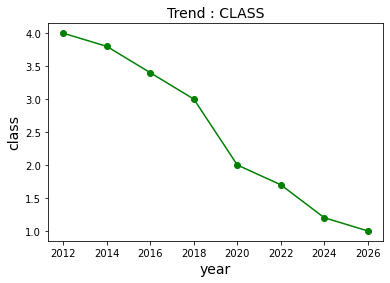

In [5]:
import matplotlib.pyplot as plt
   
year = [2012, 2014, 2016, 2018, 2020, 2022, 2024, 2026]
class_n = [4, 3.8, 3.4, 3, 2, 1.7, 1.2, 1]

plt.plot(year, class_n, color='green', marker='o')
plt.title('Trend : CLASS', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('class', fontsize=14)
plt.show()

### plt.plot from DataFrame

In [6]:
dt = pd.Series(list(range(20210101,20210106)))
val_a = pd.Series(random.sample(range(10,99), 5))
val_b = pd.Series(random.sample(range(500,999),5))
df = pd.DataFrame({'dt':dt, 'val_a':val_a, 'val_b':val_b})
df

dt  val_a  val_b
0  20210101     87    577
1  20210102     90    985
2  20210103     75    511
3  20210104     97    714
4  20210105     32    866

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dt      5 non-null      int64
 1   val_a   5 non-null      int64
 2   val_b   5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [8]:
df['dt'] = df['dt'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dt      5 non-null      object
 1   val_a   5 non-null      int64 
 2   val_b   5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


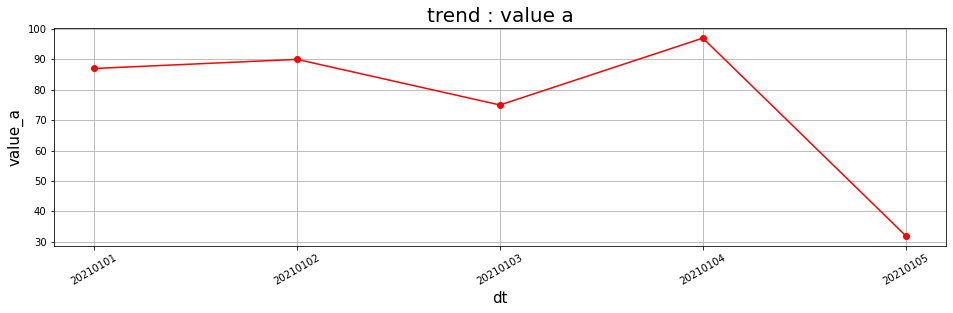

In [9]:
plt.figure(figsize=(16,4))
plt.plot(df['dt'], df['val_a'], color='red', marker='o')
plt.xticks(rotation=30)
plt.title('trend : value a', fontsize=20)
plt.xlabel('dt', fontsize=15)
plt.ylabel('value_a', fontsize=15)
plt.grid()
plt.show()

### sns.lineplot

In [13]:
dt = pd.Series(list(range(20210101,20210106)))
val_a = pd.Series(random.sample(range(10,99), 5))
val_b = pd.Series(random.sample(range(500,999),5))
df = pd.DataFrame({'dt':dt, 'val_a':val_a, 'val_b':val_b})
df

dt  val_a  val_b
0  20210101     88    506
1  20210102     33    521
2  20210103     57    876
3  20210104     41    844
4  20210105     66    869

In [15]:
df.melt()

variable     value
0        dt  20210101
1        dt  20210102
2        dt  20210103
3        dt  20210104
4        dt  20210105
5     val_a        88
6     val_a        33
7     val_a        57
8     val_a        41
9     val_a        66
10    val_b       506
11    val_b       521
12    val_b       876
13    val_b       844
14    val_b       869

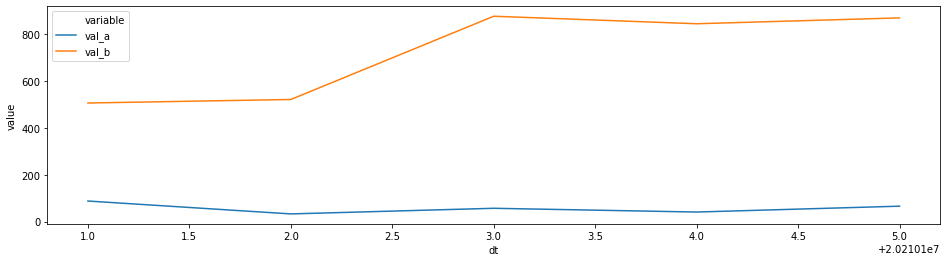

In [16]:
plt.figure(figsize=(16,4))
sns.lineplot(x='dt', y='value', hue='variable', data=pd.melt(df,'dt'))

# plt (2)
 - subplot / subplots

### subplot

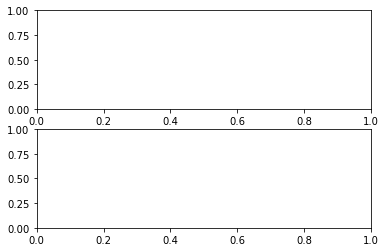

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

plt.show()

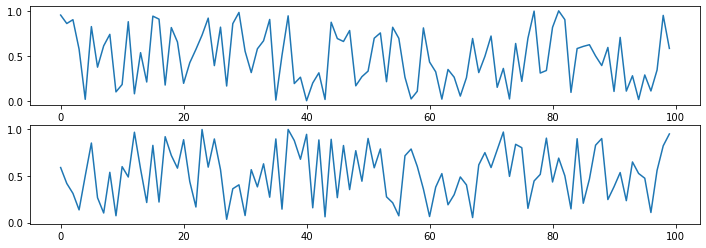

In [39]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(np.random.rand(100))

ax2 = fig.add_subplot(2,1,2)
ax2.plot(np.random.rand(100))

plt.show()

### subplots

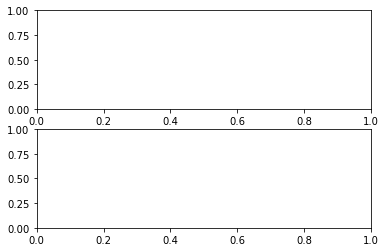

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)

plt.show()

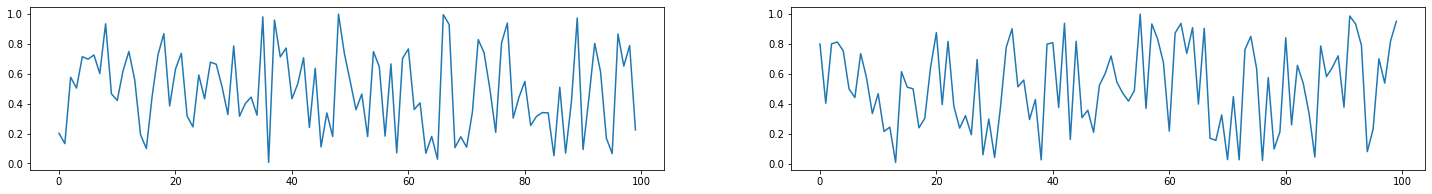

In [42]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(25, 3))
axes[0].plot(np.random.rand(100))
axes[1].plot(np.random.rand(100))

plt.show()

# Temp

In [52]:
a = [0,0,0,1,1,2,2,3]
b = ['A','B','C','A','B','A','C','C']
df = pd.DataFrame({'id':a, 'value':b})
df

id value
0   0     A
1   0     B
2   0     C
3   1     A
4   1     B
5   2     A
6   2     C
7   3     C

#### 1) loc 이용

In [53]:
df['value'].isin(['A','C'])

0     True
1    False
2     True
3     True
4    False
5     True
6     True
7     True
Name: value, dtype: bool

In [54]:
df[df['value'].isin(['A','C'])]['id'].values

array([0, 0, 1, 2, 2, 3])

In [55]:
df.loc[df['value'].isin(['A','C'])]['id'].values

array([0, 0, 1, 2, 2, 3])

In [56]:
df.loc[(df['value']=='A') | (df['value']=='C')]['id'].values

array([0, 0, 1, 2, 2, 3])

In [69]:
tmp = df.loc[df['value'].isin(['A','C'])]['id']
tmp

0    0
2    0
3    1
5    2
6    2
7    3
Name: id, dtype: int64

In [70]:
tmp.duplicated()

0    False
2     True
3    False
5    False
6     True
7    False
Name: id, dtype: bool

In [71]:
tmp[tmp.duplicated()].values

array([0, 2])

#### 2) set 이용

In [99]:
# 원리
a = {1,2,3}; b = {3,4,5}; a.intersection(b)

{3}

In [88]:
set(df[df.value=='A'].id).intersection(set(df[df.value=='C'].id))

{0, 2}

In [89]:
df[df.value=='A'].id

0    0
3    1
5    2
Name: id, dtype: int64

In [94]:
set(df[df.value=='A'].id)

{0, 1, 2}

In [92]:
df[df.value=='C'].id

2    0
6    2
7    3
Name: id, dtype: int64

In [95]:
set(df[df.value=='C'].id)

{0, 2, 3}

In [96]:
set(df[df.value=='A'].id).intersection(set(df[df.value=='C'].id))

{0, 2}